# **Big Data Mining 2021-22 - Final Assignment** 
### **Instructions:**
* **Fill your ID Here:** 315355537
* Work on the assignment and submit your solution *individually*. <br> 
No sharing of information on the assignment is allowed between student. 


* **Format:** Fill code, text explanations and output (figures, tables ..) in the designated places. <br>For some questions, the code you fill should run in this .ipynb notebook and generate the output automatically after running (e.g. in `google colab`). <br>For others, you will need to run commands in other environments(e.g. unix) - in this case, just copy the commands and the relevant outputs in the designated text blocks. 
* Submit your filled solution by July 28th 23:59 your solution on moodle. 


* **Grading:** There are overall three questions. The number of points is shown for each question and sub-question. 
* **Note:** Points from your grade may be deducted for submitting wrong/missing parts of files OR if not submitting the complete generated/complied output.
* **Note:** Some parts of the code may take up to several hours to run.Be patient. However, don't leave everything to run at the last minute but prepare in advance so that your entire solution runs and finishes on time.
* **Good luck!**


## **Question 1: Build a Network by Web-Crawling [30pt]**

In this question we will build a network of web-pages that is part of the World-Wide-Web. This is a directed graph, where each node corresponds to a web-page, and each edge from node $a$ to node $b$ corresponds to an outgoing link from page $a$ to page $b$. 
To do so, we will run a web-crawler (a similar well known related concept is web-scraper), using the unix command `scrapy`. 
The web-crawler starts at a certain starting page, finds all outgoing hyperlinks, and goes to the corresponding pages. It then does the same for each outgoing page, recuresively. 

For example, suppose that we crawl the following network of webpages:

![WebExample](https://computersciencewiki.org/images/8/8b/Web_directed_graph.png)

and suppose that we start the crawler at the page called `"Networks"`. Then at the first step, the crawler will extract the webpages `"I teach at Univ. of X"` and `"Networks class blog"`. Next, it will also extract the webpages `"Univ. of X"`, `"Blog post about Company Z"` and `"Blog post about college rankings"`. The crawler will never extract the pages `"My song lyrics"` and `"I'm applying to college"`, no matter how long it will run.

**a. [6pt]** Clone the [PageRankScrapy](https://github.com/kod5kod/PageRankScrapy) repository from github to a local directory. <br>
Install the `scrapy` crawler using `pip install scrapy` in the unix command line. <br>
You may need to install additional software before like `pip` - follow the instructions in the Follow the `Readme` file of the `PageRankScrapy` for more details. 

After installation, run the `scrapy` command from the unix command line, to start at the wikipedia page: `https://en.wikipedia.org/wiki/Statistics`, and extract only pages that are connected from it and belong to the domain `https://en.wikipedia.org/wiki` (i.e. we restrict ourselves only to `wikipedia` pages with url starting at this string). Set the number of pages crawled to **one million**.  <br>
(**Hint:** You can copy the command available in the Readme file of the above repository, and change it to fullfil the question's instructions).

If successful, the `scrapy` command will fill two local files: 
1. `keyvalue` with the node IDs and names (page urls)
2. `transition` with link information: each line contains a node ID for a source page and the node IDs of all pages that can be reached from the source by a single hyperlink.

After finishing/stopping the crawler, display the first five lines of the `keyvalue` and `transition` output files. 


**Note:** The files are filled as the command is running, and running the crawler on the entire wikipedia may take too long. 
However, extracting the first **one million** distinct pages (nodes) should not take more than a couple of hours with a stable internet connection. <br>
The crawler may include many pages as nodes without their outgoing hyperlinks (edges). This is fine, we will just use the nodes and edges retrieved by the crawler as our network for further analysis.



**b. [6pt]** In unix, parse the resulting `transition` file to a file with the same information called `network`, but in which each line corresponds to a `single edge`, with two columns showing the IDs of the two corresponding nodes, such that for a directed edge $a \to b$ we have $a$ in the first column and $b$ in the second column. For example the line: <br>
4&nbsp;&nbsp;&nbsp;2,5,9

should be replaced by the following three lines:  
4&nbsp;2 <br>
4&nbsp;5 <br>
4&nbsp;9

For the resulting file, display the (ordered) pairs of urls corresponding to the first $10$ rows (edges). You will need to use also the `keyvalue` file.

**c. [6pt]** The web-crawler works by parsing the text of a webpage, finding all the (outgoing) hyperlinks, and adding them as directed edges before moving to the corrsponding pages. Suppose that a webpage $a$ has two or more *identical* hyperlinks, i.e. pointing to the *same* page. Will the crawler notice this and output only one edge, or will it display the target page twice or more? <br>
Write a unix command that checks using the file `transition` which of the two options is correct, and write your conclusion (we are just interested in `detection`. No need to change the file and remove multiple identical edges if there are any). 

**d. [12pt]** Compute and report basic statistics for the network, using unix commands. You may use for each statistic either the `transition` file format or the `network` file format, or both, as desired. 
1. Verify the total number of nodes. What is the number of nodes with at least one outgoing edge? <br>
2. What is the total number of (directed) edges (corresponding to hyperlinks) 
3. Compute the out-degree of each node, sort the nodes by their computed out-degree, and output the top 10 nodes with the highest out-degree (show both ID and url). <br>
&nbsp;&nbsp;**Note:** You may ignore here nodes with zero out-degree
4. Compute the in-degree of each node, sort the nodes by their computed in-degree, and output the top 10 nodes with the highest in-degree  (show both ID and url)


Write the commands that you use and the corresponding outputs in the designated **text** blocks below. 


## **Question 1 Solutions:** <FillBelow>


a. Unix command/s for Web Crawling: <br>
`scrapy crawl pagerank -a start='https://en.wikipedia.org/wiki/statistics' -a domain='en.wikipedia.org' -a maxpages=47000`

a.2 Unix command/s for the First 5 lines of resulting file:

`head -n 5 transition`

`head -n 5 keyvalue`


First 5 lines of resulting file: <br>
"transition" file:

`0       1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,0,446,447,448,449,450,451,452,453,454
34      26,455,35,456,457,458,31,459,460,461,462,463,464,465,466,467,468,469,397,470,471,472,473,474,475,476,32,477,321,478,353,479,480,235,236,240,233,442,445,34,481,447,448,449,450,451,452,453,454
1       442,2,482,0,483,484,485,445,1,447,448,449,450,451,452,453,454
35      26,427,455,486,487,431,255,488,489,490,491,468,492,493,458,494,495,496,497,498,499,500,501,502,503,504,380,505,506,365,507,508,509,34,510,132,511,512,513,514,25,233,250,235,247,515,442,516,445,35,517,447,448,449,450,451,452,453,454
30      318,142,0,118,518,519,520,521,116,522,146,147,127,131,340,132,523,524,525,526,527,528,17,64,119,529,494,66,125,530,531,532,533,48,534,28,535,371,294,374,536,537,538,423,539,540,541,542,543,544,383,545,546,547,548,549,550,235,233,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,509,567,568,569,508,442,445,30,447,448,449,450,451,452,453,454`

"keyvalue" file:

0       https://en.wikipedia.org/wiki/Statistics

1       https://en.wikipedia.org/wiki/Category:Statistics

2       https://en.wikipedia.org/wiki/Portal:Mathematics

3       https://en.wikipedia.org/wiki/Normal_distribution

4       https://en.wikipedia.org/wiki/Scatter_plot


b. Unix command/s for parsing the file and converting to a networks format: <br>

First we will change the check so that in each row there will be values separated by space only:

`sed 's/\t/,/g' transition > b_temp1`

`sed 's/,/ /g' b_temp1 > b_temp2`

We will now make a separation between all the lines as we were asked in the question:

`awk '{for (i=2; i<=NF; ++i) print $1, $i}' b_temp2 > network`

To switch between the keys and the urls we will write as follows:

`awk 'FNR==NR { array[$1]=$2; next } { for (i in array) gsub(i, array[i]) }1' keyvalue network > network_values`

`head -n 10 network_values`

First 10 lines of resulting file, corresponding to first 10 edges <br>
https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Category:Statistics

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Portal:Mathematics

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Normal_distribution

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Scatter_plot

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Iris_flower_data_set

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Data

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Statistical_model

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Statistical_survey

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Experimental_design

https://en.wikipedia.org/wiki/Statistics https://en.wikipedia.org/wiki/Category:Statisticshttps://en.wikipedia.org/wiki/Statistics

c. Unix command/s for checking if there are non unique edges: <br>
`sort network | uniq -cd | sort -nr`

(this command get only the duplicate lines in the file- most frequent first)

Conclusion: <br>
`The query did not return any results at all. Since there are no duplicate lines it can be concluded that the algorithm does skip a link that appears more than once on a particular page.
Although this may be due to the fact that none of the pages has the same link more than once, this option is not reasonable at all and therefore it can be concluded that indeed the algorithm is responsible for duplicate entries not appearing twice.`

d. 
1. Commands for extracting numbers of nodes: <br>

`To get the total number of nodes I will use the network file I built. We want to count every node we have reached but do so only once even if we have reached it several times. That is, we want to get the number of unique values in the second column in this file. The command that does this is:`

`awk '{print $2}' network | sort | uniq | wc -l`<br>

`To get the number of nodes with at least one outgoing edge coming out of them we need to count the number of unique values in the first column in the network file.`

`awk '{print $1}' network | sort | uniq | wc -l`

Resulting numbers of nodes: <br>


`Total number of nodes: 1014007`

`number of nodes with at least one outgoing edge coming out of them: 47000`

2. Command/s for extracting number of edges: <br>
`The total number of (directed) edges is the number of rows in the network file:` 

 ` wc -l network`

Resulting number of edges: <br>
`11874148`

3. Command/s for computing&sorting by out-degrees: <br>
` awk '{A[$1]++}END{for(i in A)print i,A[i]}' network |sort -k2 -rn > out_degree_count` <br>

The command used to add the url is:

`awk 'NR==FNR{a[$1]=$2;next}{print $0,a[$1]}' keyvalue out_degree_count > degree_url`

The command to display the results (where the first column is the ID, the second column is the out-degree of the node, and the third column is the url) is:

`head -n 10 degree_url`

Top 10 pages: <br>

`165426 3837 https://en.wikipedia.org/wiki/Ideological_politics`

`66232 2907 https://en.wikipedia.org/wiki/Alcohol_(drug)`

`35010 2507 https://en.wikipedia.org/wiki/Nitrous_oxide`

`17152 2452 https://en.wikipedia.org/wiki/Outline_of_Islam`

`40454 2304 https://en.wikipedia.org/wiki/Portal:World`

`84321 2224 https://en.wikipedia.org/wiki/Roman_Catholics`

`45477 2224 https://en.wikipedia.org/wiki/Roman_Catholicism`

`403810 2224 https://en.wikipedia.org/wiki/Catholic_Christian`

`36631 2224 https://en.wikipedia.org/wiki/Catholic_church`

`384350 2135 https://en.wikipedia.org/wiki/Europea`

4. Command/s for computing&sorting by in-degrees: <br>
` awk '{A[$2]++}END{for(i in A)print i,A[i]}' network |sort -k2 -rn > in_degree_count` <br>

The command used to add the url is:

`NR==FNR{a[$1]=$2;next}{print $0,a[$1]}' keyvalue in_degree_count > in_degree_url`

The command to display the results (where the first column is the ID, the second column is the in-degree of the node, and the third column is the url) is:

`head -n 10 in_degree_url`

Top 10 pages: <br>

`454 47000 https://en.wikipedia.org/wiki/Special:SpecialPages`

`453 47000 https://en.wikipedia.org/wiki/Help:Introduction`

`452 47000 https://en.wikipedia.org/wiki/Help:Contents`

`451 47000 https://en.wikipedia.org/wiki/Wikipedia:Contact_us`

`450 47000 https://en.wikipedia.org/wiki/Wikipedia:About`

`449 47000 https://en.wikipedia.org/wiki/Special:Random`

`448 47000 https://en.wikipedia.org/wiki/Wikipedia:Contents`

`447 47000 https://en.wikipedia.org/wiki/Main_Page`

`445 47000 https://en.wikipedia.org/wiki/Special:MyTalk`

`442 46951 https://en.wikipedia.org/wiki/Help:Category`



## **Question 2: Degrees, Communities, Clustering Coefficient, Random Networks  [34pt]** <br>

**a. [6pt]** Extract the DBLP collaboration network file `com-dblp.ungraph.txt`, and load it to the python notebook.  <br>
This **undirected** network describes collaboration between computer science authors, where each node corresponds to an author, and each edge corresponds to a joint publication of two authors. <br>
Compute and report the number of nodes, number of edges, number of triangles and global clustering coefficient of the network.


**b. [6pt]** Compute the degree of every node in the network, and list the IDs of the five nodes (authors) with the highest degree. <br>
Next, compute and plot the `degree distribution` of the graph, i.e. the relative frequency $f_i$ (out of $n$) of nodes having degree $i$ for every $i$ from $0$ to the maximal degree. You should choose the type of plot that shows the degree distribution clearly.

**c. [6pt]** Simulate a random graph using the `Erdos-Renyi` model with the edge probability $p$ chosen such that the same number of nodes $n$ as the DBLP network, and such the `expected` number of overall edges in the simulated random graph is equal to the number of edges in the DBLP graph.
Compute and plot the degree distribution for the random graph in similar to (b.), either on the same or on separate plots. <br>
Is the `Erdos-Renyi` model a good generative model fro this graph, based on the degree distribution?

**d. [8pt]** Run the `asyn_lpa_communities` algorithm available in `networkx` for finding the community structure for the graph, implemented in the `networkx.algorithms.community` python module. Report the number of communities found.  <br>

Compare the division to communities found by the algorithm to the ground truth, given in the file `com-dblp.all.cmty.txt`, where each row corresponds to a cummunity. Report the [Adjusted Rand Index (ARI)](https://en.wikipedia.org/wiki/Rand_index#:~:text=The%20adjusted%20Rand%20index%20is,specified%20by%20a%20random%20model.). <br>
**Explanation:** ARI is an index that measures how well two partitions of the same set (e.g. two clustering results) agree with each other. For example ARI is equal to $1$ when the two partitions completely agree with each other, and is equal to approximately $0$ for two random partitions. A python implementation of ARI is available in `scikit-learn`.

**Note:** When you compare the communities found by our algorithm to the true communities, there are some issues that make the comparison non-ideal. <br>
There are missing labels you need to take care of. In particular, put all the nodes that appear in the graph but do not appear in any true community, in a new, separate community. 
Also, the true communities are overlapping, so some nodes may be present in more than one community. For simplicity, assign them to one of the communities at random.

**e. [8pt]** Draw $100$ random networks with the same degree distribution as the real DBLP network, but with edges between pairs of nodes drawn randomly, using the function `sample_random_graph_with_degree_seq` supplied to you, with at least $100,000$ iteration per random network. 
Start the randomization of each random network from the preious one. 
This implementation approximates sampling a graph from the 
[configuration model](https://en.wikipedia.org/wiki/Configuration_model) that is implemented in `networkx`, but is too slow and memory-consuming for our purposes. <br>
Compute the global clustering coefficient for each random network, and plot the empirical distribution of the $100$ clustering coefficients. How do they compare to the clustering coefficient of the real network computed in (a.)? 
Is the configuration model a good generative model for the network based on the clustering coefficient? <br>
Run also the community detection algorithm as in (d.) for **one** of the $100$ random networks. Report the number of communities and the ARI value with respect to the ground truth. How do these values compare to the values reported in (d.)? Are the results surprising?



Write the commands that you use in the designated **code** blocks below. <br>
The output should be generated automatically when running the .ipynb notebook (e.g. in `google colab`). <br> 
You may include additional text blocks with explanations and clarifications.



In [ ]:
# Question 2 Solutions: 
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import scipy.stats as st
import pandas as pd
import scipy.special
from scipy import stats


from google.colab import files
uploaded = files.upload()

Saving com-dblp.all.cmty.txt to com-dblp.all.cmty.txt
Saving com-dblp.ungraph.txt to com-dblp.ungraph.txt


In [ ]:
# a. Code for reading the DBLP network here: 
G = nx.read_edgelist('com-dblp.ungraph.txt')

# Code to output the number of nodes, edges, triangles and clustering coefficient here:
number_of_triangles = sum(nx.triangles(G).values()) / 3
c_coef = nx.transitivity(G)

print(G)
print("The number of triangles is: "+str(int(number_of_triangles)))
print("The global clustering coefficient of the network is: "+str(c_coef))


Graph with 317080 nodes and 1049866 edges
The number of triangles is: 2224385
The global clustering coefficient of the network is: 0.3063766130023435


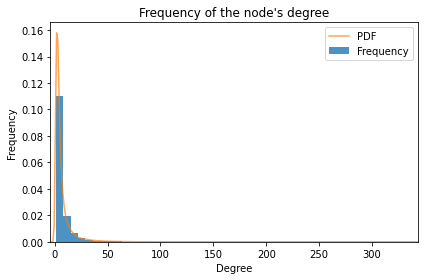

The IDs of the 5 nodes with the highest degree are: ['38868', '45479', '57571', '6737', '72210']


In [ ]:
# b. Code for Computing and plotting the degree distribution, and for printing the top highest degree nodes: 
sort_graph = sorted(G.degree, key=lambda x: x[1], reverse=True)[0:5]
high_nodes = [i[0] for i in sort_graph]


nodes_degree = G.degree 
degree_only = [i[1] for i in nodes_degree]

fig = plt.figure(figsize=(6, 4))
bins = np.linspace(math.ceil(min(degree_only)), 
                   math.floor(max(degree_only)),
                   50) 
plt.xlim([min(degree_only)-5, max(degree_only)])
plt.hist(degree_only, bins=bins, alpha=0.8,density=True,label="Frequency")

mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(degree_only)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF",alpha=0.7)
plt.legend(loc="upper right")

plt.title("Frequency of the node's degree")
plt.xlabel('Degree')
plt.ylabel('Frequency')

fig.tight_layout()
plt.show()

print("The IDs of the 5 nodes with the highest degree are: "+str(high_nodes))


According to Erdos Renyl Model a graph with values G(n,p) has on average  $${n \choose 2}p$$ edges. 

Therefor in our case I chose $$p=\frac{number\:of\:edges}{{n \choose 2}} $$ where n= number of nodes in the DBLP network.

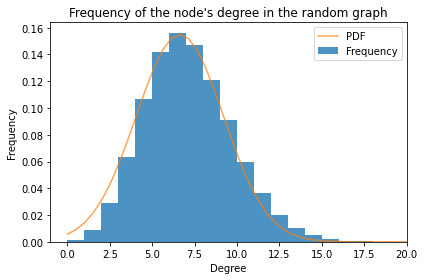

In [ ]:
# c. Simulation code for the Erdos-Renyi model
p = 1049866/scipy.special.binom(317080, 2)

r_G = nx.erdos_renyi_graph(317080,p)

# Code for Computing and plotting the degree distribution for the random graph: 

r_nodes_degree = r_G.degree 
r_degree_only = [i[1] for i in r_nodes_degree]

fig = plt.figure(figsize=(6, 4))
bins = np.linspace(math.ceil(min(r_degree_only)), 
                   math.floor(max(r_degree_only)),
                   21) 
plt.xlim([min(r_degree_only)-1, max(r_degree_only)])
plt.hist(r_degree_only, bins=bins, alpha=0.8,density=True,label="Frequency")

mn, mx = plt.xlim()
plt.xlim(mn, mx)

a = pd.DataFrame(r_degree_only)
param = stats.norm.fit(a)
x = np.linspace(*a.agg([min, max]), 25) 
plt.plot(x, stats.norm.pdf(x, *param), label="PDF",alpha=0.7)

plt.legend(loc="upper right")
plt.title("Frequency of the node's degree in the random graph")
plt.xlabel('Degree')
plt.ylabel('Frequency')



fig.tight_layout()
plt.show()

We see that in the histogram of the random graph the distribution of the node's degree is closer to the normal distribution than to the distribution of the original graph. In the original graph the node's degrees were distributed very unevenly. Most nodes (i.e. authors) has few edges (i.e. joint publications of two authors), and a small portion of the vertices had many edges. In the random graph, on the other hand, most edges have more or less the same degree.

Therefore, in this aspect the Erdos-Renyi model is not a good generative model for this graph.

In [ ]:
# d. Run the community detection algorithm and report the resulting number of commuunities
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms import community
from sklearn.metrics.cluster import adjusted_rand_score

c = list(nx.algorithms.community.asyn_lpa_communities(G,weight=None))
print("The number of communities found is: "+str(len(c)))


# Load the ground-trush communities and compute and report the ARI between the two

alg_com = [list(ele) for ele in c] #makes the communities found by the algorithm to list of lists (insted of sets)

f = open('com-dblp.all.cmty.txt') 
lines = f.read().splitlines() 
real_cmty = []
for l in lines:
  real_cmty.append(l.split('\t')) # list of lists where every small list is a real community 
  
all_nodes = set(G.nodes) #all of the nodes in the graph

all_nodes_in_com = set()
for cm in real_cmty:
  all_nodes_in_com.update(set(cm)) #set of all the nodes in the communities file

#to add the nodes that in the graph but not in the communities file as new community:
lst = list(all_nodes - all_nodes_in_com)  
real_cmty.append(lst)


#to remove an association of one node to two communities
in_community = set()
real_cmty_clean = list()
for cm in real_cmty:
  real_cmty_clean.append(list(set(cm)-in_community)) #add element only if did not appear yet
  in_community.update(set(cm))

#Create two dictionaries so that each node has two clusters each representing a community.
#One community is the real community, and the other community is the one created using the algorithm.
real_dict = dict()
for i in range(len(real_cmty_clean)):
  value = i
  temp = dict.fromkeys(real_cmty_clean[i], value)
  real_dict.update(temp)

alg_dict = dict()
for i in range(len(alg_com)):
  value = i
  temp = dict.fromkeys(alg_com[i], value)
  alg_dict.update(temp)


real_cluster = [real_dict[x] for x in list(G.nodes)] #the real cluster of every node
alg_cluster = [alg_dict[x] for x in list(G.nodes)] #the cluster of every node calculated by the algorithm.


print("The Adjusted Rand Index (ARI) is: "+str(format(adjusted_rand_score(real_cluster,alg_cluster), '.8f')))

The number of communities found is: 46470
The Adjusted Rand Index (ARI) is: 0.00025120


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The number of communities found in the random graph is: 73502
The Adjusted Rand Index (ARI) for the random graph is: 0.00000762


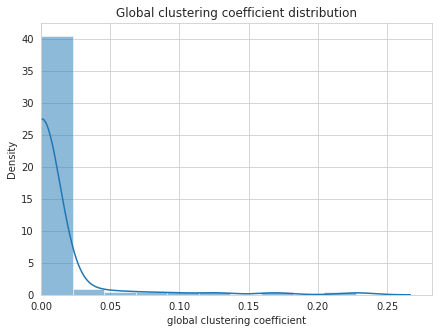

In [ ]:
# e. Loop and generate 100 random networks, and compute the clustering coefficient for each one:
import random
import copy
from random import randrange
from networkx.algorithms.community import asyn_lpa_communities
from networkx.algorithms import community
from sklearn.metrics.cluster import adjusted_rand_score
import seaborn as sns

G = nx.read_edgelist('com-dblp.ungraph.txt')

def sample_random_graph_with_degree_seq(G, iters = 100000):
    G_rand = G # Note! we don't do deep copy here to save time. But the function can modify G. It is better to keep a separate copy of G outside the function
    edges = random.sample(list(G_rand.edges()), 2*iters)

    for i in range(0, iters, 2):
#        if i%1000 == 0:
#            print("Run: ", i)  # you can turn off/on internal printing
        if edges[i] in G_rand.edges() and edges[i+1] in G_rand.edges() and len(set(edges[0] + edges[1])) == 4: # swap
            G_rand.remove_edges_from([edges[i], edges[i+1]])
            G_rand.add_edges_from([ (edges[i][0], edges[i+1][1]), (edges[i][1], edges[i+1][0])  ])

    return G_rand

choose_1random_graph = random.randint(0, 100) # to choose 1 random graph from the sample
clustering_coefficient_lst = list()
old_graph = G
for i in range(100):
  r_graph = sample_random_graph_with_degree_seq(old_graph)
  r_graph_coef = nx.transitivity(r_graph)
  clustering_coefficient_lst.append(r_graph_coef)
  old_graph = r_graph
  if choose_1random_graph == i:
    random_graph1 = r_graph

# Display the empirical distribution and compare to the clustering coefficient of the real network

sns.set_style('whitegrid')
plt.figure(figsize=(7, 5))
g = sns.distplot(clustering_coefficient_lst, hist=True,bins=10,hist_kws=dict(alpha=0.5))
g.set(xlim=(0, None),title='Global clustering coefficient distribution',xlabel='global clustering coefficient')


# Run community detection for a random network and report the number of communities and ARI with the ground truth

# random_graph1 is the network chose randomly over the 100 networks 
c = list(nx.algorithms.community.asyn_lpa_communities(random_graph1,weight=None))
print("The number of communities found in the random graph is: "+str(len(c)))

# Load the ground-trush communities and compute and report the ARI between the two

alg_com = [list(ele) for ele in c] #makes the communities found by the algorithm to list of lists (insted of sets)

f = open('com-dblp.all.cmty.txt') 
lines = f.read().splitlines() 
real_cmty = []
for l in lines:
  real_cmty.append(l.split('\t')) # list of lists where every small list is a real community 
  
all_nodes = set(random_graph1.nodes) #all of the nodes in the graph

all_nodes_in_com = set()
for cm in real_cmty:
  all_nodes_in_com.update(set(cm)) #set of all the nodes in the communities file

#to add the nodes that in the graph but not in the communities file as new community:
lst = list(all_nodes - all_nodes_in_com)  
real_cmty.append(lst)

#to remove an association of one node to two communities
in_community = set()
real_cmty_clean = list()
for cm in real_cmty:
  real_cmty_clean.append(list(set(cm)-in_community)) #add element only if did not appear yet
  in_community.update(set(cm))

#Create two dictionaries so that each node has two clusters each representing a community.
#One community is the real community, and the other community is the one created using the algorithm.
real_dict = dict()
for i in range(len(real_cmty_clean)):
  value = i
  temp = dict.fromkeys(real_cmty_clean[i], value)
  real_dict.update(temp)

alg_dict = dict()
for i in range(len(alg_com)):
  value = i
  temp = dict.fromkeys(alg_com[i], value)
  alg_dict.update(temp)


real_cluster = [real_dict[x] for x in list(random_graph1.nodes)] #the real cluster of every node
alg_cluster = [alg_dict[x] for x in list(random_graph1.nodes)] #the cluster of every node calculated by the algorithm.


print("The Adjusted Rand Index (ARI) for the random graph is: "+str(format(adjusted_rand_score(real_cluster,alg_cluster), '.8f')))

From looking at the distribution of the global clustering coefficient we see that the value obtained for the random graph is lower than the original graph. Most of the global clustering coefficient of the random networks are between 0 to 0.05 (for the original graph this value is equal to 0.306). Hence, in this aspect the configuration model is not a good generative model for the network.


Compared to the original graph we got a much higher number of communities but the ARI rate was lower. This is not surprising because when the graph is calculated randomly the chance of finding large communities is small. 
A community is an expression that there is a connection between the nodes, but when the edges are determined randomly it is unlikely that there will be a connection between so many nodes.

In edition, ARI rate is expected to be lower for the random network. The ARI rate measures the quality of the division into communities of the algorithm but since the communities are determined randomly (because the choice of the edges is random), it is unlikely that there will be a match between the communities the algorithm found and the real communities.
